# Feature selection

Loading libraries

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

Loading data

In [44]:
data = pd.read_csv("customer_analysis_case_study_all_data.csv").drop(['Unnamed: 0'], axis =1)
data.head()

,total claim amount,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,...,renew offer type_Offer3.1,renew offer type_Offer4.1,sales channel_Branch.1,sales channel_Call Center.1,sales channel_Web.1,vehicle class_Luxury Car.1,vehicle class_Luxury SUV.1,vehicle class_SUV.1,vehicle class_Sports Car.1,vehicle class_Two-Door Car.1
0,292.800000,4809.216960,48029.000,61,7.000000,52,0.000000,9,0,0,...,1,0,0,0,0,0,0,0,0,0
1,744.924331,2228.525238,50414.978,64,3.000000,26,0.000000,1,1,0,...,0,1,0,1,0,0,0,0,0,0
2,480.000000,14947.917300,22139.000,100,34.000000,31,0.000000,2,0,0,...,1,0,0,1,0,0,0,1,0,0
3,484.013411,22332.439460,49078.000,97,10.000000,3,0.000000,2,0,0,...,0,0,1,0,0,0,0,0,0,0
4,707.925645,9025.067525,23675.000,117,15.146716,31,0.383734,7,0,0,...,0,0,1,0,0,0,0,0,0,0


Defining X/y

In [45]:
X = data.drop(columns=['total claim amount'], axis = 1)
y = np.log(data['total claim amount'])

Data splitting

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

In [29]:
X_train.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,renew offer type_Offer3.1,renew offer type_Offer4.1,sales channel_Branch.1,sales channel_Call Center.1,sales channel_Web.1,vehicle class_Luxury Car.1,vehicle class_Luxury SUV.1,vehicle class_SUV.1,vehicle class_Sports Car.1,vehicle class_Two-Door Car.1
count,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,...,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,8029.325042,50575.558636,93.100517,15.197895,48.155942,0.374919,2.998708,0.382457,0.092062,0.266674,...,0.162283,0.111790,0.280883,0.195632,0.149248,0.017496,0.019140,0.182950,0.051080,0.191052
std,6977.395155,20983.873582,34.105718,9.786156,27.914249,0.868750,2.415817,0.486016,0.289130,0.442247,...,0.368732,0.315126,0.449457,0.396710,0.356354,0.131120,0.137027,0.386648,0.220175,0.393153
min,1898.007675,10074.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3996.418672,34614.000000,68.000000,7.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5757.489397,50414.978000,83.000000,15.000000,48.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8929.743271,62488.000000,109.000000,23.000000,71.000000,0.000000,4.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Variance threshold method

Univariate method

In [30]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=100) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (8516, 197)

Final number of numerical columns:  (8516, 4)



,customer lifetime value,income,monthly premium auto,months since policy inception
0,5040.775434,22350.000,66.0,3.0
1,11624.821490,50414.978,113.0,66.0
2,5398.098108,73775.000,67.0,51.0
3,2514.591960,43860.000,65.0,58.0
4,4762.156975,36529.000,118.0,41.0
...,...,...,...,...
8511,5012.184756,20976.000,129.0,86.0
8512,4034.926461,50414.978,112.0,28.0
8513,6829.413399,50414.978,66.0,73.0
8514,9212.613275,70958.000,115.0,57.0


#### Correlation Matrix

Univariate method

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(data.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['total claim amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

data[cols_to_keep]

['monthly premium auto', 'location code_Suburban.1', 'location code_Suburban', 'employmentstatus_Employed', 'employmentstatus_Employed.1', 'employmentstatus_Unemployed.1', 'employmentstatus_Unemployed', 'vehicle class_Luxury Car.1', 'vehicle class_Luxury Car', 'vehicle class_Luxury SUV.1', 'vehicle class_Luxury SUV', 'total claim amount']


,monthly premium auto,location code_Suburban.1,location code_Suburban,employmentstatus_Employed,employmentstatus_Employed.1,employmentstatus_Unemployed.1,employmentstatus_Unemployed,vehicle class_Luxury Car.1,vehicle class_Luxury Car,vehicle class_Luxury SUV.1,vehicle class_Luxury SUV,total claim amount
0,61,1,1,1,1,0,0,0,0,0,0,292.800000
1,64,1,1,0,0,1,1,0,0,0,0,744.924331
2,100,1,1,1,1,0,0,0,0,0,0,480.000000
3,97,1,1,1,1,0,0,0,0,0,0,484.013411
4,117,1,1,0,0,0,0,0,0,0,0,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...
10641,253,1,1,0,0,1,1,1,1,0,0,1214.400000
10642,65,0,0,1,1,0,0,0,0,0,0,273.018929
10643,201,0,0,1,1,0,0,0,0,1,1,381.306996
10644,158,0,0,1,1,0,0,0,0,0,0,618.288849


#### Recursive feature elimination

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 50, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
F

,state_California,state_Nevada,state_Washington,coverage_Extended,coverage_Premium,effective to date_1/10/11,effective to date_1/11/11,effective to date_1/12/11,effective to date_1/13/11,effective to date_1/2/11,...,location code_Suburban.1,location code_Urban.1,marital status_Single.1,policy type_Special Auto.1,policy_Corporate L2.1,policy_Personal L1.1,policy_Personal L2.1,policy_Personal L3.1,policy_Special L2.1,policy_Special L3.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Embedded Methods

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)

In [36]:
X_train

array([[1.02135634e+04, 3.97190000e+04, 1.31000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.61302313e+03, 5.70990000e+04, 6.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.32110109e+04, 7.46560000e+04, 1.11000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.82941340e+03, 5.04149780e+04, 6.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.21261327e+03, 7.09580000e+04, 1.15000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.64682208e+04, 5.04149780e+04, 6.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### OLS

In [37]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.73307795290425, Test -> 0.7522676038440762


#### Lasso Model

In [38]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.6412161691573145, Test -> 0.6662201281754521


#### Ridge

In [39]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.3576831806358597, Test -> 0.38517736436236316


#### ElasticNet

In [40]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.5813837370785205, Test -> 0.607302720006617


#### Fitting OLS model

Defining X/y

In [50]:
X = data.drop('total claim amount', axis=1)
y = np.log(data['total claim amount'])

X = X.select_dtypes(include=np.number)
X_added_constant = sm.add_constant(X)
ols_model = sm.OLS(y,X_added_constant).fit()

In [ ]:
#X_added_constant = sm.add_constant(X)

In [51]:
# we need to add this constant value of 1 for the intercepts
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total claim amount   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     299.8
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:12:15   Log-Likelihood:                -7123.7
No. Observations:               10646   AIC:                         1.445e+04
Df Residuals:                   10545   BIC:                         1.518e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.5521      0.063     56.797      0.000       3.430       3.675
customer lifetime value           1.128e-06    7.4e-07      1.524      0.127   -3.22e-07    2.58e-06
income                           -5.287e-07   2.72e-07     -1.945      0.052   -1.06e-06    4.22e-09
monthly premium auto                 0.0086      0.000     18.909      0.000       0.008       0.009
months since last claim              0.0003      0.000      0.556      0.578      -0.001       0.001
months since policy inception    -5.923e-05      0.000     -0.353      0.724      -0.000       0.000
number of open complaints           -0.0053      0.005     -1.011      0.312      -0.016       0.005
number of policies                   0.0038      0.002      1.964      0.050    6.83e-06       0.008
state_California                    -0.0005      0.007     -0.080      0.936      -0.014       0.012
state_Nevada                         0.0046      0.009      0.492      0.623      -0.014       0.023
state_Oregon                        -0.0080      0.007     -1.126      0.260      -0.022       0.006
state_Washington                     0.0125      0.010      1.289      0.197      -0.007       0.032
response_Yes                        -0.0086      0.008     -1.104      0.269      -0.024       0.007
coverage_Extended                    0.0169      0.007      2.438      0.015       0.003       0.031
coverage_Premium                     0.0234      0.014      1.711      0.087      -0.003       0.050
effective to date_1/10/11           -0.0512      0.024     -2.113      0.035      -0.099      -0.004
effective to date_1/11/11           -0.0579      0.025     -2.287      0.022      -0.108      -0.008
effective to date_1/12/11           -0.0040      0.027     -0.144      0.885      -0.058       0.050
effective to date_1/13/11            0.0088      0.026      0.338      0.736      -0.042       0.060
effective to date_1/14/11           -0.0476      0.026     -1.845      0.065      -0.098       0.003
effective to date_1/15/11           -0.0202      0.026     -0.780      0.435      -0.071       0.031
effective to date_1/16/11           -0.0062      0.026     -0.238      0.812      -0.057       0.045
effective to date_1/17/11           -0.0315      0.025     -1.281      0.200      -0.080       0.017
effective to date_1/18/11           -0.0209      0.026     -0.815      0.415      -0.071       0.029
effective to date_1/19/11           -0.0186      0.025     -0.753      0.451      -0.067       0.030
effective to date_1/2/11            -0.0092      0.026     -0.360      0.719      -0.059       0.041
effective to date_1/20/11           -0.0121      0.025     -0.478      0.632      -0.062       0.038
effective to date_1/21/11           -0.0272      0.02

Drop all the columns with pv < 0.05

In [54]:
#Function to drop features with pval < 0.05
X = data.drop('total claim amount', axis=1)
y = np.log(data['total claim amount'])

X = X.select_dtypes(include=np.number)
X_added_constant = sm.add_constant(X)
ols_model = sm.OLS(y,X_added_constant).fit()

## drop features with pval < 0.05
pv = ols_model.pvalues
X_pfiltered = X_added_constant[pv[pv < 0.05].index].drop('const', axis=1).reset_index(drop=True)
X_pfiltered.shape

(10646, 40)

#### KNN

Loading data

In [81]:
data = pd.read_csv("customer_analysis_case_study_newest_version.txt").drop(['Unnamed: 0'], axis =1)

In [82]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,4809.22,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.00,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,NaN
1,California,2228.53,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.00,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,NaN
2,Washington,14947.92,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.00,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,A
3,Oregon,22332.44,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.00,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,A
4,Oregon,9025.07,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,0.00,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,15563.37,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,0.00,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize,A
10772,Oregon,5259.44,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.00,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize,A
10773,Arizona,23893.30,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.00,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize,NaN
10774,California,11971.98,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,4.00,6,Personal Auto,Personal L1,Offer1,Branch,618.29,SUV,Medsize,A


In [85]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

Defining X, y

In [89]:
# define X and y (features and target)
X = data.drop(columns=['total_claim_amount'], axis = 1)
y = np.log(data['total_claim_amount'])

In [91]:
X = X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.22,48029,61,7.00,52,0.00,9
1,2228.53,0,64,3.00,26,0.00,1
2,14947.92,22139,100,34.00,31,0.00,2
3,22332.44,49078,97,10.00,3,0.00,2
4,9025.07,23675,117,15.15,31,0.00,7
...,...,...,...,...,...,...,...
10771,15563.37,0,253,15.15,40,0.00,7
10772,5259.44,61146,65,7.00,68,0.00,6
10773,23893.30,39837,201,11.00,63,0.00,2
10774,11971.98,64195,158,0.00,27,4.00,6


Data splitting

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

Modelling

In [93]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

trans = PowerTransformer()
model = LinearRegression()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

Evaluating the model performance

In [94]:
performance_lm, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm

,Error_metric,Train,Test
0,Mean error,71.53,67.45
1,Mean absolute error,169.91,169.63
2,Mean squared error,51049.08,51327.28
3,Root mean squared error,225.94,226.56
4,Mean absolute percentual error,205.39,176.41
5,R2,0.41,0.39


KNN 

In [95]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=3) # n_neighbors = K

In [96]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=3)

Making predictions

In [99]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,75.29,70.75
1,Mean absolute error,158.48,164.61
2,Mean squared error,47462.33,51178.30
3,Root mean squared error,217.86,226.23
4,Mean absolute percentual error,159.25,150.54
5,R2,0.45,0.39


In [100]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,22.33,23.70
1,2,Mean absolute error,75.09,149.01
2,2,Mean squared error,17196.10,51331.57
3,2,Root mean squared error,131.13,226.56
4,2,Mean absolute percentual error,32.82,137.33
...,...,...,...,...
1,20,Mean absolute error,158.48,164.61
2,20,Mean squared error,47462.33,51178.30
3,20,Root mean squared error,217.86,226.23
4,20,Mean absolute percentual error,159.25,150.54


Checking for overfitting

In [101]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.80,0.39
5,3,R2,0.70,0.43
5,4,R2,0.65,0.45
5,5,R2,0.62,0.44
5,6,R2,0.59,0.44
5,7,R2,0.57,0.44
5,8,R2,0.55,0.44
5,9,R2,0.54,0.43
5,10,R2,0.53,0.43
5,11,R2,0.52,0.43


In [102]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,22.33
1,2,Mean absolute error,Train,75.09
2,2,Mean squared error,Train,17196.10
3,2,Root mean squared error,Train,131.13
4,2,Mean absolute percentual error,Train,32.82
...,...,...,...,...
223,20,Mean absolute error,Test,164.61
224,20,Mean squared error,Test,51178.30
225,20,Root mean squared error,Test,226.23
226,20,Mean absolute percentual error,Test,150.54


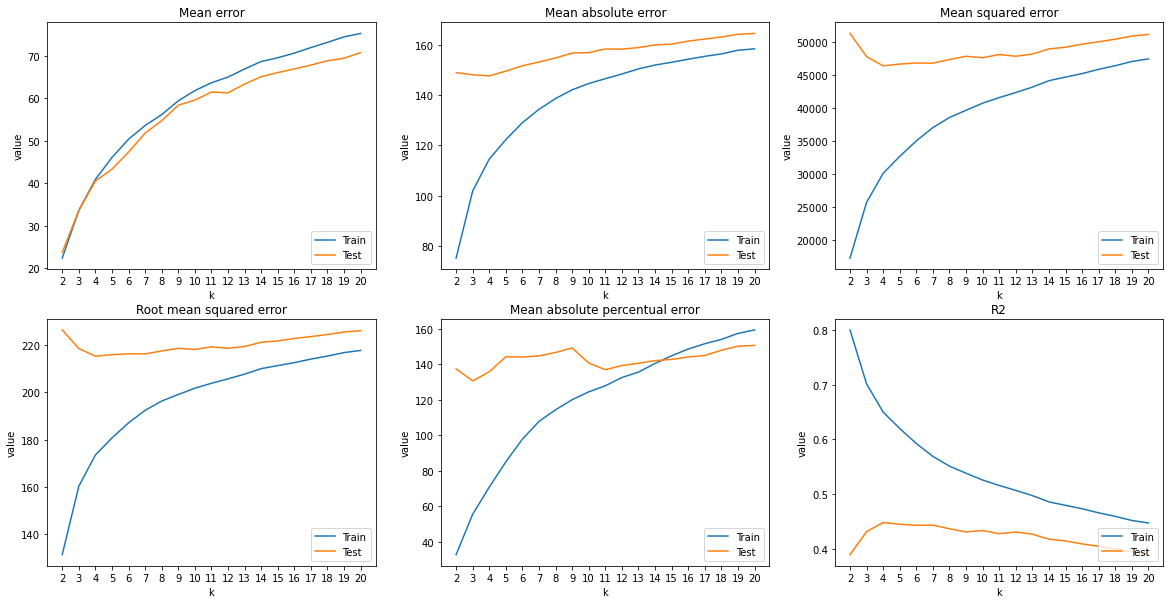

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')